In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anupshende000","key":"db329eed07940de03bbd70bb95cae255"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d sarthakvajpayee/ai-indian-license-plate-recognition-data


Dataset URL: https://www.kaggle.com/datasets/sarthakvajpayee/ai-indian-license-plate-recognition-data
License(s): unknown
  0% 0.00/1.50M [00:00<?, ?B/s]
100% 1.50M/1.50M [00:00<00:00, 1.02GB/s]


In [4]:
!unzip -q ai-indian-license-plate-recognition-data.zip -d /content/

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import os
import cv2

from warnings import filterwarnings
filterwarnings("ignore")

# Data augmentation

In [56]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1
)


In [57]:
val_datagen = ImageDataGenerator(
    rescale=1./255
)


In [58]:
IMG_SIZE = (32, 32)
BATCH_SIZE = 32

train_generator = train_datagen.flow_from_directory(
    "data/data/train",
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)



Found 864 images belonging to 36 classes.


In [59]:

val_generator = val_datagen.flow_from_directory(
    "data/data/val",
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 216 images belonging to 36 classes.


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

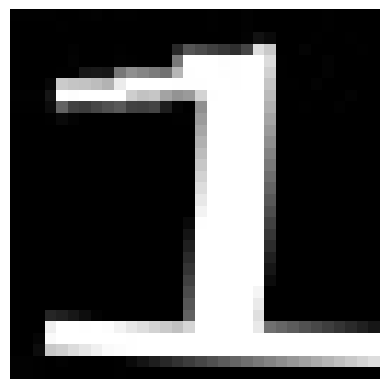

In [60]:
x, y = next(train_generator)

plt.imshow(x[5].squeeze(), cmap="gray")
plt.axis("off")


## Model training-1

In [61]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(32,32,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(36, activation="softmax")
])


In [62]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [63]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "char_recognition_cnn.h5",
    monitor="val_accuracy",
    save_best_only=True
)    # Best model will be saved

In [64]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/30
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0443 - loss: 3.5751

27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.0449 - loss: 3.5734 - val_accuracy: 0.1620 - val_loss: 3.3764
Epoch 2/30
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1223 - loss: 3.3104

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1250 - loss: 3.2946 - val_accuracy: 0.4676 - val_loss: 2.3529
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2467 - loss: 2.6289

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2469 - loss: 2.6260 - val_accuracy: 0.6806 - val_loss: 1.5760
Epoch 4/30
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3619 - loss: 2.1198

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3656 - loss: 2.1091 - val_accuracy: 0.7917 - val_loss: 1.0341
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4286 - loss: 1.7422

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4310 - loss: 1.7364 - val_accuracy: 0.8148 - val_loss: 0.6470
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5310 - loss: 1.4921 - val_accuracy: 0.8009 - val_loss: 0.6204
Epoch 7/30
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6394 - loss: 1.1440

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6385 - loss: 1.1432 - val_accuracy: 0.9120 - val_loss: 0.3807
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6822 - loss: 0.9748 - val_accuracy: 0.8565 - val_loss: 0.4519
Epoch 9/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7017 - loss: 0.8986

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7019 - loss: 0.8986 - val_accuracy: 0.9306 - val_loss: 0.2905
Epoch 10/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6980 - loss: 0.8953 - val_accuracy: 0.8750 - val_loss: 0.3143
Epoch 11/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7500 - loss: 0.7291 - val_accuracy: 0.8843 - val_loss: 0.3177
Epoch 12/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7582 - loss: 0.6657 - val_accuracy: 0.8981 - val_loss: 0.2664
Epoch 13/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8174 - loss: 0.5486 - val_accuracy: 0.9306 - val_loss: 0.1764
Epoch 14/30
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8048 - loss: 0.5480

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8021 - loss: 0.5554 - val_accuracy: 0.9583 - val_loss: 0.1566
Epoch 15/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8402 - loss: 0.4896 - val_accuracy: 0.9306 - val_loss: 0.1899
Epoch 16/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8212 - loss: 0.5399 - val_accuracy: 0.9583 - val_loss: 0.1514
Epoch 17/30
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8306 - loss: 0.4804

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8314 - loss: 0.4795 - val_accuracy: 0.9722 - val_loss: 0.1240
Epoch 18/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8384 - loss: 0.4905 - val_accuracy: 0.9491 - val_loss: 0.1435
Epoch 19/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8614 - loss: 0.4095 - val_accuracy: 0.9676 - val_loss: 0.1003
Epoch 20/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8601 - loss: 0.3788 - val_accuracy: 0.9491 - val_loss: 0.1298
Epoch 21/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8508 - loss: 0.4173 - val_accuracy: 0.9398 - val_loss: 0.1457
Epoch 22/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8817 - loss: 0.3446 - val_accuracy: 0.9630 - val_loss: 0.0875
Epoch 23/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8659 - loss: 0.4007 - val_accuracy: 0.9722 - val_loss: 0.1032
Epoch 24/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9013 - loss: 0.3387

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9008 - loss: 0.3395 - val_accuracy: 0.9815 - val_loss: 0.0864
Epoch 25/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8707 - loss: 0.3429 - val_accuracy: 0.9537 - val_loss: 0.0950
Epoch 26/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8745 - loss: 0.3705 - val_accuracy: 0.9630 - val_loss: 0.0971
Epoch 27/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9065 - loss: 0.2777 - val_accuracy: 0.9722 - val_loss: 0.0888
Epoch 28/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8799 - loss: 0.3284 - val_accuracy: 0.9583 - val_loss: 0.0924
Epoch 29/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8881 - loss: 0.3283 - val_accuracy: 0.9815 - val_loss: 0.0754
Epoch 30/30
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8963 - loss: 0.2913

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8955 - loss: 0.2935 - val_accuracy: 0.9861 - val_loss: 0.0904


In [65]:
sav = load_model("char_recognition_cnn.h5")

In [66]:
sav.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,982 (636.65 KB)

 Trainable params: 162,980 (636.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Plot for accuracies of model

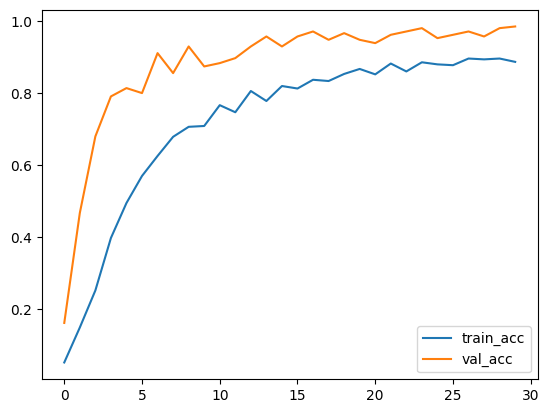

In [67]:

plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()
plt.show()


**Performance meterics and classification report**

In [68]:

model_saved = load_model("char_recognition_cnn.h5")


In [69]:
val_loss, val_accuracy = model_saved.evaluate(val_generator)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9903 - loss: 0.0981


In [70]:

tr_loss, tr_accuracy = model_saved.evaluate(train_generator)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9503 - loss: 0.1425


**classification report**

In [71]:

val_generator.reset()
pred_probs_s = model_saved.predict(val_generator)
y_pred_s = np.argmax(pred_probs_s, axis=1)
y_true_s = val_generator.classes


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


In [72]:
val_generator.reset()
pred_probs_s = model_saved.predict(val_generator)
y_pred_s = np.argmax(pred_probs_s, axis=1)
y_true_s = val_generator.classes

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [73]:

class_labels = list(val_generator.class_indices.keys())

print(classification_report(y_true_s, y_pred_s, target_names=class_labels))

              precision    recall  f1-score   support

     class_0       0.86      1.00      0.92         6
     class_1       1.00      1.00      1.00         6
     class_2       1.00      1.00      1.00         6
     class_3       1.00      1.00      1.00         6
     class_4       1.00      1.00      1.00         6
     class_5       1.00      1.00      1.00         6
     class_6       1.00      1.00      1.00         6
     class_7       1.00      1.00      1.00         6
     class_8       1.00      1.00      1.00         6
     class_9       1.00      1.00      1.00         6
     class_A       1.00      1.00      1.00         6
     class_B       1.00      1.00      1.00         6
     class_C       1.00      1.00      1.00         6
     class_D       1.00      1.00      1.00         6
     class_E       1.00      1.00      1.00         6
     class_F       1.00      1.00      1.00         6
     class_G       1.00      1.00      1.00         6
     class_H       1.00    

# Using Haar Cascade model for the license plate detection

In [74]:
# Loading the image and preprocessing
img = cv2.imread("/content/car.jpg")
img = cv2.resize(img, (800, int(800 * img.shape[0] / img.shape[1])))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [75]:

# Load cascade
plate_cascade = cv2.CascadeClassifier(
    "haarcascade_russian_plate_number.xml"
)




In [76]:
plates = plate_cascade.detectMultiScale(
    img,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(60, 20)
)


In [77]:
plate_img = None
output = img.copy()

for (x, y, w, h) in plates:
    # draw yellow rectangle
    cv2.rectangle(
        output,
        (x, y),
        (x + w, y + h),
        (0, 255, 255),
        3
    )

    # crop plate
    plate_img = img[y:y+h, x:x+w]
    break   # take first detected plate


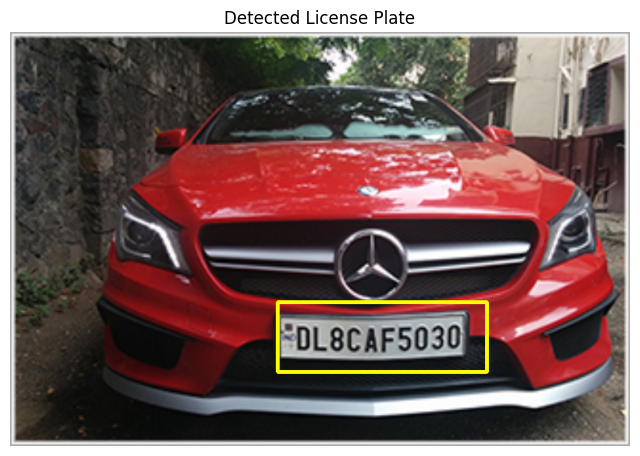

In [78]:
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected License Plate")
plt.axis("off")
plt.show()


**Displaying cropped plate**

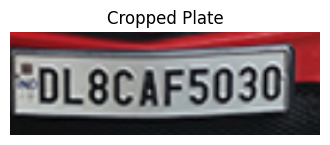

In [79]:
if plate_img is not None:
    plt.figure(figsize=(4,2))
    plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
    plt.title("Cropped Plate")
    plt.axis("off")
    plt.show()
else:
    print("No plate detected")


array([[[ 29,  26, 191],
        [ 29,  26, 191],
        [ 29,  25, 190],
        ...,
        [ 49,  42, 167],
        [ 50,  43, 166],
        [ 49,  42, 165]],

       [[ 36,  29, 190],
        [ 35,  29, 190],
        [ 35,  28, 190],
        ...,
        [ 41,  36, 157],
        [ 41,  36, 156],
        [ 40,  35, 155]],

       [[ 42,  32, 189],
        [ 42,  32, 190],
        [ 41,  32, 189],
        ...,
        [ 32,  30, 147],
        [ 32,  30, 146],
        [ 32,  29, 145]],

       ...,

       [[ 17,  18,  16],
        [ 17,  18,  16],
        [ 17,  17,  16],
        ...,
        [ 24,  21,  17],
        [ 25,  22,  18],
        [ 26,  23,  19]],

       [[ 17,  18,  16],
        [ 17,  18,  16],
        [ 18,  17,  16],
        ...,
        [ 26,  23,  19],
        [ 24,  22,  17],
        [ 24,  21,  16]],

       [[ 17,  17,  15],
        [ 17,  17,  15],
        [ 18,  16,  15],
        ...,
        [ 26,  23,  19],
        [ 25,  22,  18],
        [ 25,  22,  18]]], dtype=uint8)
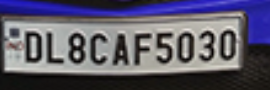

In [80]:
plate_img

### Function to detect the characters in the license plate and bound with the boxes

In [81]:

def segment_characters_debug(image):
    #  Preprocessing
    # Resize to standard height
    img_h, img_w = image.shape[:2]
    new_h = 75
    new_w = int(new_h * (img_w / img_h))
    img = cv2.resize(image, (new_w, new_h))

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's Thresholding
    # Characters should be WHITE, Background should be BLACK
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Visualization 1: Checking the binary image
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("1. Grayscale (Resized)")

    plt.subplot(1, 3, 2)
    plt.imshow(binary, cmap='gray')
    plt.title("2. Binary ")

    #  Contour Detection
    # Useing RETR_TREE to find nested contours (in case text is inside a border)
    contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    #  Filtering & Visualization
    vis_img = img.copy()
    char_list = []

    #  Thresholds
    min_h = 20
    max_h = 70
    min_w = 4
    max_w = 55
    min_area = 50

    print(f"Found {len(contours)} raw contours. Filtering...")

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        area = w * h

        # Draw ALL contours in RED first (to see what is being detected)
        cv2.rectangle(vis_img, (x, y), (x + w, y + h), (255, 0, 0), 1)

        # Appling Filter
        if min_h < h < max_h and min_w < w < max_w and area > min_area:
            # Draw ACCEPTED contours in GREEN
            cv2.rectangle(vis_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Cropping plate
            char_crop = binary[y:y+h, x:x+w]
            char_crop = cv2.resize(char_crop, (28, 28))
            char_list.append((x, char_crop))
        else:
            # Optional: Print why it failed for larger contours
            if area > 100:
                print(f"Rejected contour at x={x}: h={h} (needs {min_h}-{max_h}), w={w}")

    # Sort
    char_list.sort(key=lambda x: x[0])
    final_chars = [c[1] for c in char_list]

    # Visualization 2: Showing boxes around characters (Red=Reject, Green=Keep)
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
    plt.title(f"3. Detection ")
    plt.show()

    return final_chars


Processing plate..
Found 25 raw contours. Filtering...
Rejected contour at x=0: h=75 (needs 20-70), w=225
Rejected contour at x=2: h=54 (needs 20-70), w=202
Rejected contour at x=151: h=20 (needs 20-70), w=7
Rejected contour at x=24: h=20 (needs 20-70), w=8
Rejected contour at x=186: h=20 (needs 20-70), w=7


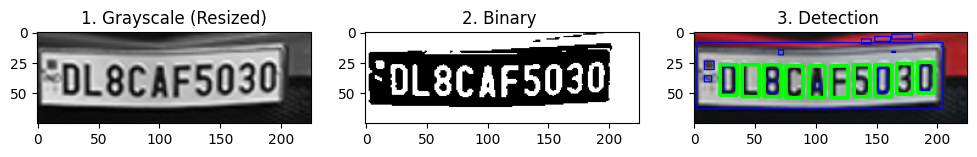


Success! Segmented 10 characters.


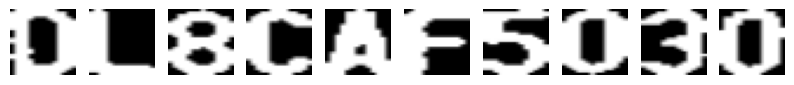

In [82]:
# Displaying segmented characters
if 'plate_img' in locals() and plate_img is not None:
    print("Processing plate..")
    chars = segment_characters_debug(plate_img)

    if len(chars) > 0:
        print(f"\nSuccess! Segmented {len(chars)} characters.")
        # Show the actual characters passed to CNN
        fig, axes = plt.subplots(1, len(chars), figsize=(10, 3))
        if len(chars) == 1: axes = [axes]
        for ax, c in zip(axes, chars):
            ax.imshow(c, cmap='gray')
            ax.axis('off')
        plt.show()
    else:
        print("\n No characters Found.")


### Using a character recognition model(CNN Model) trained earlier to detect the characters from the license plate

In [83]:
# Loading the model
ocr_model = load_model("char_recognition_cnn.h5")

#### Function to detect the text from the plate

In [84]:

char_map = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

def predict_plate_text(model, character_list):
    plate_string = ""

    for char_img in character_list:

        resized_char_img = cv2.resize(char_img, (32, 32))

        #  Normalize
        img = resized_char_img.astype('float32') / 255.0

        #  Reshape
        img = np.reshape(img, (1, 32, 32, 1))

        #  Predict
        prediction = model.predict(img)

        #  Get index of highest probability
        best_index = np.argmax(prediction)

        # Map index to character
        plate_string += char_map[best_index]

    return plate_string

final_text = predict_plate_text(ocr_model, chars)
print(f"CNN Prediction: {final_text}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
CNN Prediction: DL8CAF5030


In [85]:
print(final_text)

DL8CAF5030


*Segmented characters and their predicted value.*


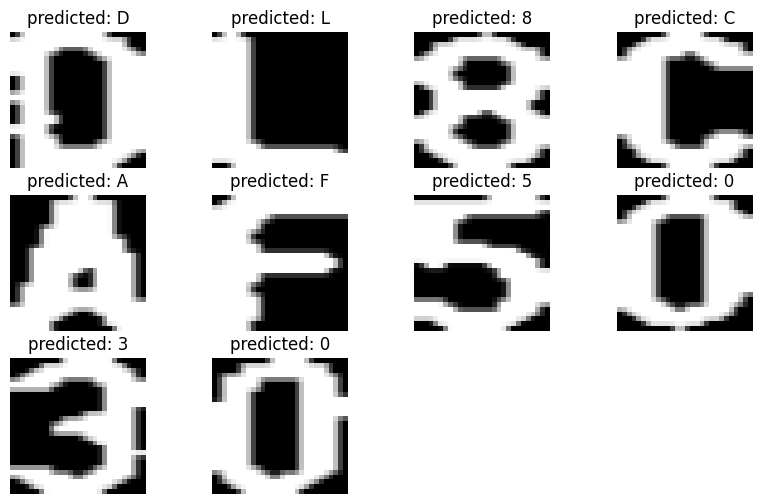

In [86]:
plt.figure(figsize=(10,6))
for i,ch in enumerate(chars):
    img = cv2.resize(ch, (28,28), interpolation=cv2.INTER_AREA)
    plt.subplot(3,4,i+1)
    plt.imshow(img,cmap='gray')
    # Display the predicted character from final_text
    predicted_char = final_text[i] if i < len(final_text) else '?'
    plt.title(f'predicted: {predicted_char}')
    plt.axis('off')
plt.show()

In [89]:
def visualize_final_result(original_img, plate_coords, plate_text):

    result_img = original_img.copy()

    x, y, w, h = plate_coords

    # Bright Green color (B, G, R)
    box_color = (0, 255, 0)
    # Black text color
    text_color = (0, 0, 0)


    font_scale = max(0.6, h / 100.0)
    thickness = max(1, int(font_scale * 2))
    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.rectangle(result_img, (x, y), (x + w, y + h), box_color, 3)


    (text_w, text_h), baseline = cv2.getTextSize(plate_text, font, font_scale, thickness)


    bg_x1 = x
    bg_y1 = y - text_h - 10
    bg_x2 = x + text_w + 20
    bg_y2 = y


    if bg_y1 < 0:
        bg_y1 = y + h
        bg_y2 = y + h + text_h + 10
        text_y_pos = bg_y2 - 5
    else:
        text_y_pos = bg_y2 - 5


    cv2.rectangle(result_img, (bg_x1, bg_y1), (bg_x2, bg_y2), box_color, -1)


    cv2.putText(result_img, plate_text, (x + 10, text_y_pos), font, font_scale, text_color, thickness)

    #  Display
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Final Detected & Recognized License Plate")
    plt.show()

    return result_img

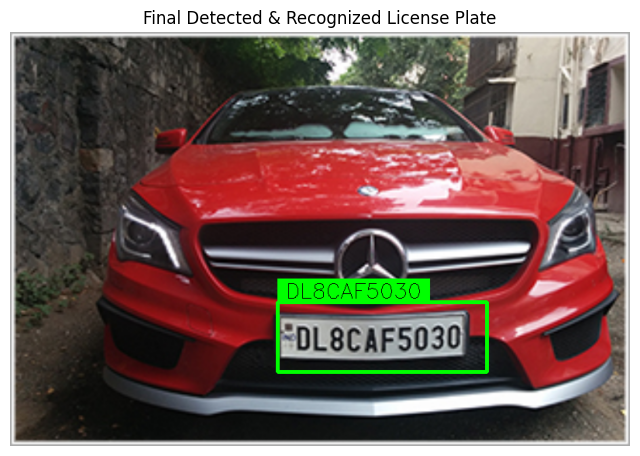

array([[[171, 171, 171],
        [171, 171, 171],
        [171, 170, 171],
        ...,
        [169, 172, 170],
        [169, 172, 170],
        [169, 172, 170]],

       [[171, 171, 171],
        [172, 172, 172],
        [176, 175, 176],
        ...,
        [174, 176, 175],
        [170, 173, 171],
        [169, 172, 170]],

       [[171, 171, 170],
        [175, 176, 175],
        [193, 193, 193],
        ...,
        [193, 194, 193],
        [176, 176, 175],
        [171, 171, 171]],

       ...,

       [[170, 171, 171],
        [175, 175, 175],
        [193, 193, 193],
        ...,
        [193, 193, 193],
        [175, 175, 175],
        [171, 171, 171]],

       [[171, 171, 171],
        [172, 172, 172],
        [176, 176, 176],
        ...,
        [176, 176, 176],
        [172, 172, 172],
        [171, 171, 171]],

       [[171, 171, 171],
        [171, 171, 171],
        [171, 171, 171],
        ...,
        [171, 171, 171],
        [171, 171, 171],
        [171, 171, 171]]], dtype=uint8)
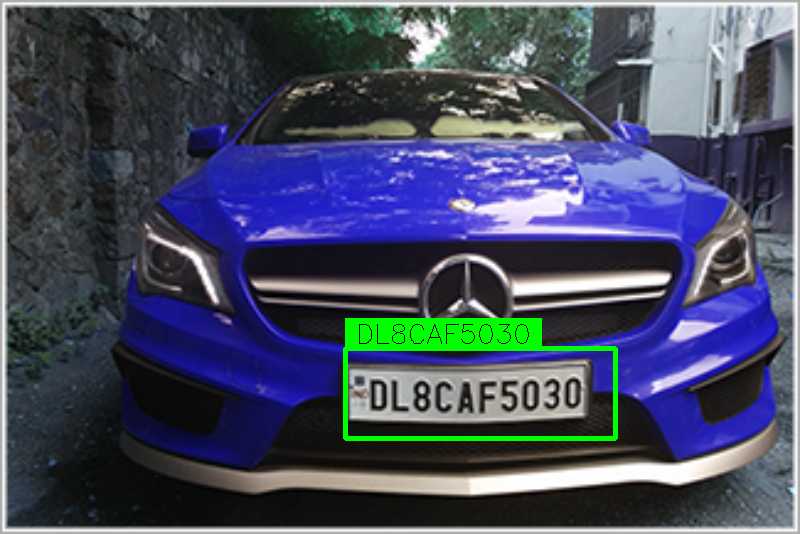

In [90]:
visualize_final_result(output, (x, y, w, h), final_text)